In [3]:
pip install yfinance --upgrade --no-cache-dir

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

# Matplotlib
import matplotlib as plt
import matplotlib.style
plt.style.use('ggplot')

In [5]:
asset = 'GOOG'
start_date = '2017-01-01'
end_date = '2022-02-25'
data = yf.download(asset, interval = '1d', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


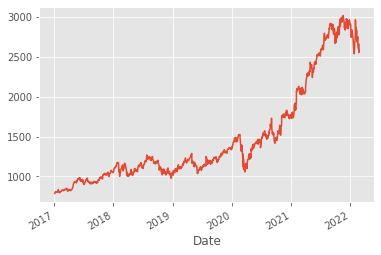

In [6]:
data['Adj Close'].plot()

# Calculando el Sharpe Ratio

In [7]:
# Necesitamos primero el CAGR
def CAGR(DF):
  df = DF.copy()
  df['retorno_diario'] = df['Adj Close'].pct_change()

  df['retorno_acumulado'] = (1 + df['retorno_diario']).cumprod()
  numero_anios = len(df)/252
  CAGR = (df['retorno_acumulado'][-1])**(1/numero_anios)-1
  return CAGR

def Volatibilidad(DF):
  df = DF.copy()
  df['retorno_diario'] = df['Adj Close'].pct_change()
  vol = df['retorno_diario'].std()*np.sqrt(252)
  return vol

In [9]:
# riskfree rate -> Tasa libre de riesgo - Es un valor como punto de referencia
# Puede ser un activo del menor riesgo que un inversionista podria adquirir
# basado en el mercado o jurisdiccion del activo
# El valor es esatndar que se ocupa en la bolsa americana
def Sharpe(DF, riskfree_rate=0.022):
  df = DF.copy()
  sharpe_ratio = (CAGR(df) - riskfree_rate) / Volatibilidad(df)
  return sharpe_ratio

In [10]:
Sharpe(data)

0.8956015607854295

El sharpe ratio nos da como resultado 0.89 (recordemos que Sharpe de 1, es bueno, aqui estamos obteniendo un Sharpe menor)

**NOTA:** Recordemos que estamos basando las funciones en las estrategias más basicas de ***Buy & Hold***

# Calulo del Sortino Ratio

In [13]:
def Sortino(DF, riskfree_rate = 0.22):
  df = DF.copy()
  df['retorno_diario'] = df['Adj Close'].pct_change()
  
  # El sortino posee el volumen negativo
  # Por eso seleccionamos los valores menores a 0 en la columna de retorno diario
  # Calculamos la volatibilidad de esos valores (std) multiplicado por la raiz
  # cuadrada de 252
  neg_vol = df[df['retorno_diario'] < 0]['retorno_diario'].std()*np.sqrt(252)
  
  # Calculamos el sortino ratio
  sortino_ratio = (CAGR(df) - riskfree_rate) / neg_vol
  return sortino_ratio

- ***df['retorno_diario'] < 0***: Retornara valores Verdadero o Falso (Verdadero para valores menores que 0), de esta manera clasificamos los valores positivos (+) y negativos (-).

  - Ahora, si envolvemos esa declaración entre corchetes **[]**, seleccionará y **devolverá** el dataframe con la columna *retorno_diario*, que contiene solamente los valores que cumplen con ese criterio *(Verdadero para valores menores que 0)*. Siendo:
  
    **df[df['retorno_diario'] < 0]**

  - Pero si queremos obtener no todo el dataframe, sino solamente la columna 'retornos_diario'. Agregamos *['retorno_diario']* (la columna deseada) a la declaración: 
  
     **df[df['retorno_diario'] < 0]['retorno_diario']**

In [14]:
Sortino(data)

0.22272896396018466

El Sortino Ratio nos da como resultado al rededor de: 0.22 (recordemos que Sortino de 1, es bueno, aqui estamos consiguiendo un sortino menor)

NOTA: Recordemos que estamos basando las funciones en la estrategia mas basicas de ***Buy & Hold***